### Description:

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

### Dataset Description:

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

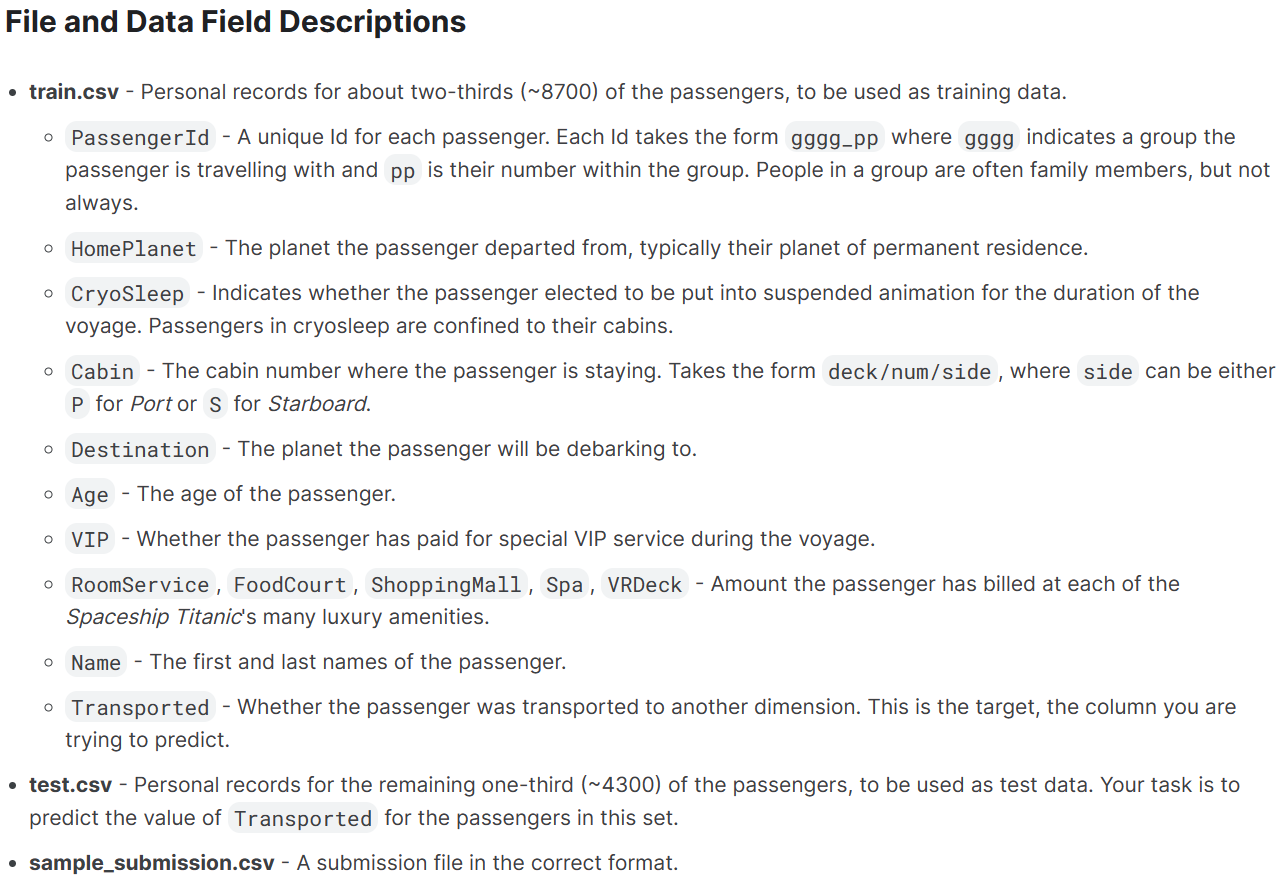

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


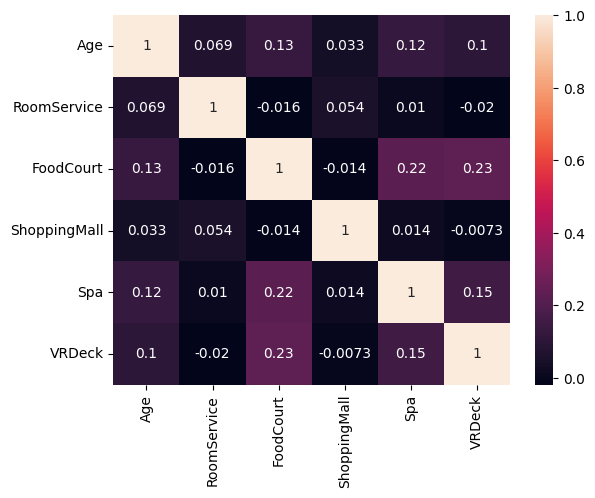

In [7]:
correlation = train.select_dtypes(include=['float64','int']).corr()
sns.heatmap(correlation,annot=True);

In [8]:
train.drop(['Name'],axis=1,inplace=True)

In [9]:
train[['Group','Person']] = train['PassengerId'].str.split('_',expand=True)

In [10]:
train[['Deck','Num','Side']] = train['Cabin'].str.split('/',expand=True)

In [11]:
train.drop(['PassengerId','Cabin'],axis=1,inplace=True)

In [12]:
train['Leisure_Total'] = train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [13]:
def process(df):
    df[['Group','Person']] = df['PassengerId'].str.split('_',expand=True)
    df.drop(['PassengerId','Name'],axis=1,inplace=True)
    
    df[['Deck','Num','Side']] = df['Cabin'].str.split('/',expand=True)
    df.drop(['Cabin'],axis=1,inplace=True)
    
    df['Leisure_Total'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [14]:
process(test)

In [15]:
test.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Person,Deck,Num,Side,Leisure_Total
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013,01,G,3,S,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018,01,F,4,S,2832.0


In [16]:
train['CryoSleep'] = train.apply(lambda row: True if row['Leisure_Total'] == 0 else False
                           if pd.isna(row['CryoSleep']) else row['CryoSleep'], axis=1)

In [17]:
mean_values = train[train['CryoSleep'] == False][['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean()

train['RoomService'] = np.where(train['CryoSleep'] == True, 0.0, np.where(train['RoomService'].isna(), mean_values['RoomService'], train['RoomService']))
train['FoodCourt'] = np.where(train['CryoSleep'] == True, 0.0, np.where(train['FoodCourt'].isna(), mean_values['FoodCourt'], train['FoodCourt']))
train['ShoppingMall'] = np.where(train['CryoSleep'] == True, 0.0, np.where(train['ShoppingMall'].isna(), mean_values['ShoppingMall'], train['ShoppingMall']))
train['Spa'] = np.where(train['CryoSleep'] == True, 0.0, np.where(train['Spa'].isna(), mean_values['Spa'], train['Spa']))
train['VRDeck'] = np.where(train['CryoSleep'] == True, 0.0, np.where(train['VRDeck'].isna(), mean_values['VRDeck'], train['VRDeck']))

In [18]:
mean_for_vip = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean()

train['VIP'] = train.apply(lambda row: True if all(row[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] >= mean_for_vip) else False
                     if pd.isna(row['VIP']) else row['VIP'], axis=1)

In [19]:
train.isnull().sum()

HomePlanet       201
CryoSleep          0
Destination      182
Age              179
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported        0
Group              0
Person             0
Deck             199
Num              199
Side             199
Leisure_Total      0
dtype: int64

In [20]:
train[['CryoSleep','VIP','Transported']] = train[['CryoSleep','VIP','Transported']].astype(int)

In [21]:
def mod_int(df):
    df['CryoSleep'] = df.apply(lambda row: True if row['Leisure_Total'] == 0 else False
                           if pd.isna(row['CryoSleep']) else row['CryoSleep'], axis=1)
    
    mean_values = df[df['CryoSleep'] == False][['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean()

    df['RoomService'] = np.where(df['CryoSleep'] == True, 0.0, np.where(df['RoomService'].isna(), mean_values['RoomService'], df['RoomService']))
    df['FoodCourt'] = np.where(df['CryoSleep'] == True, 0.0, np.where(df['FoodCourt'].isna(), mean_values['FoodCourt'], df['FoodCourt']))
    df['ShoppingMall'] = np.where(df['CryoSleep'] == True, 0.0, np.where(df['ShoppingMall'].isna(), mean_values['ShoppingMall'], df['ShoppingMall']))
    df['Spa'] = np.where(df['CryoSleep'] == True, 0.0, np.where(df['Spa'].isna(), mean_values['Spa'], df['Spa']))
    df['VRDeck'] = np.where(df['CryoSleep'] == True, 0.0, np.where(df['VRDeck'].isna(), mean_values['VRDeck'], df['VRDeck']))
    
    mean_for_vip = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean()

    df['VIP'] = df.apply(lambda row: True if all(row[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] >= mean_for_vip) else False
                         if pd.isna(row['VIP']) else row['VIP'], axis=1)

    df[['CryoSleep','VIP']] = df[['CryoSleep','VIP']].astype(int)

In [22]:
mod_int(test)

In [23]:
train.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Person,Deck,Num,Side,Leisure_Total
0,Europa,1,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0001,01,B,0,P,0.0


In [24]:
impu_num_cols = ['Age']

impu_cat_cols = ['HomePlanet','Destination']

trans_cols = ['Transported']

In [25]:
imputer_num = SimpleImputer(strategy='median')
train[impu_num_cols] = imputer_num.fit_transform(train[impu_num_cols])

In [26]:
imputer_cat = SimpleImputer(strategy='most_frequent')
train[impu_cat_cols] = imputer_cat.fit_transform(train[impu_cat_cols])

In [27]:
train.isnull().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported        0
Group              0
Person             0
Deck             199
Num              199
Side             199
Leisure_Total      0
dtype: int64

In [28]:
def clean(df):
    df[impu_num_cols] = imputer_num.fit_transform(df[impu_num_cols])
    df[impu_cat_cols] = imputer_cat.fit_transform(df[impu_cat_cols])

In [29]:
clean(test)

In [30]:
train.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Person,Deck,Num,Side,Leisure_Total
0,Europa,1,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0001,01,B,0,P,0.0


In [31]:
lab_cat_cols = ['HomePlanet','Destination','Group', 'Deck','Side']

label_encoder = LabelEncoder()

for i in lab_cat_cols:
    train[i] = label_encoder.fit_transform(train[i].astype(str))


In [32]:
train.isnull().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported        0
Group              0
Person             0
Deck               0
Num              199
Side               0
Leisure_Total      0
dtype: int64

In [33]:
def fe_cat(df):
    lab_cat_cols = ['HomePlanet','Destination','Group','Deck','Side']
    
    label_encoder = LabelEncoder()
    for i in lab_cat_cols:
        df[i] = label_encoder.fit_transform(df[i].astype(str))
    return df

In [34]:
fe_cat(test)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Person,Deck,Num,Side,Leisure_Total
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,0,01,6,3,1,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,01,5,4,1,2832.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,01,2,0,1,0.0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,3,01,2,1,1,7418.0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,4,01,5,5,1,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.0,0,0.0,0.0,0.0,0.0,0.0,3058,02,6,1496,1,0.0
4273,0,0,2,42.0,0,0.0,847.0,17.0,10.0,144.0,3059,01,8,NaN,2,1018.0
4274,2,1,0,26.0,0,0.0,0.0,0.0,0.0,0.0,3060,01,3,296,0,0.0
4275,1,0,2,26.0,0,0.0,2680.0,0.0,0.0,523.0,3061,01,3,297,0,3203.0


In [35]:
# def scale(df):
#     numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Person']
#     scaler = StandardScaler()
#     df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
#     return df

# train = scale(train)
# test = scale(test)

In [36]:
train.isnull().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported        0
Group              0
Person             0
Deck               0
Num              199
Side               0
Leisure_Total      0
dtype: int64

In [37]:
x = train.drop('Transported',axis=1).values

In [38]:
y = train['Transported'].values

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [40]:
#model = LogisticRegression()
#model = DecisionTreeClassifier()
#model = RandomForestClassifier(n_estimators=35,max_depth=7,max_features='sqrt',min_samples_split=10)
#model = CatBoostClassifier()

hyperparameters = {
    'l2_leaf_reg': 1,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 150
}

model = CatBoostClassifier(
    l2_leaf_reg=hyperparameters['l2_leaf_reg'],
    learning_rate=hyperparameters['learning_rate'],
    max_depth=hyperparameters['max_depth'],
    n_estimators=hyperparameters['n_estimators'])

#model = AdaBoostClassifier()
#model = XGBClassifier()
#model = lgb.LGBMClassifier()

In [41]:
# estimators = []

# model1 = RandomForestClassifier()
# estimators.append(('RFC', model1))

# model2 = CatBoostClassifier()
# estimators.append(('CBC', model2))

# model3 = AdaBoostClassifier()
# estimators.append(('ABC', model3))

# model4 = XGBClassifier()
# estimators.append(('XGBC', model4))

# model = VotingClassifier(estimators)

In [42]:
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [50, 100, 150],
#     'l2_leaf_reg': [0.1, 1, 3]
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train, y_train)

# # Get the best parameters and score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

In [43]:
model.fit(x_train,y_train)

0:	learn: 0.6596193	total: 174ms	remaining: 26s
1:	learn: 0.6305952	total: 184ms	remaining: 13.6s
2:	learn: 0.6068769	total: 193ms	remaining: 9.47s
3:	learn: 0.5882674	total: 204ms	remaining: 7.43s
4:	learn: 0.5704380	total: 213ms	remaining: 6.19s
5:	learn: 0.5550687	total: 223ms	remaining: 5.36s
6:	learn: 0.5423415	total: 234ms	remaining: 4.79s
7:	learn: 0.5309911	total: 244ms	remaining: 4.33s
8:	learn: 0.5198857	total: 253ms	remaining: 3.96s
9:	learn: 0.5097481	total: 262ms	remaining: 3.67s
10:	learn: 0.5018960	total: 272ms	remaining: 3.44s
11:	learn: 0.4934581	total: 281ms	remaining: 3.24s
12:	learn: 0.4871494	total: 292ms	remaining: 3.08s
13:	learn: 0.4798643	total: 300ms	remaining: 2.91s
14:	learn: 0.4748146	total: 307ms	remaining: 2.76s
15:	learn: 0.4700865	total: 313ms	remaining: 2.62s
16:	learn: 0.4646727	total: 318ms	remaining: 2.48s
17:	learn: 0.4593987	total: 333ms	remaining: 2.44s
18:	learn: 0.4538792	total: 347ms	remaining: 2.4s
19:	learn: 0.4503652	total: 357ms	remaining:

In [44]:
model.score(x_train,y_train)

0.8608052588331964

In [45]:
model.score(x_test,y_test)

0.8055981595092024

In [46]:
predictions = model.predict(test)

In [47]:
predicted_df = pd.DataFrame({'Transported_Predictions': predictions})

In [48]:
predicted_df

,Transported_Predictions
0,1
1,0
2,1
3,1
4,1
...,...
4272,1
4273,0
4274,1
4275,1


In [49]:
sub = pd.read_csv('sample_submission.csv')

In [50]:
submission = sub.merge(predicted_df,left_index=True,right_index=True,how='left')

In [51]:
submission['Transported_Predictions'] = submission['Transported_Predictions'].astype(bool)

In [52]:
submission.drop(['Transported'],axis=1,inplace=True)

In [53]:
submission.rename(columns={'Transported_Predictions':'Transported'},inplace=True)

In [54]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [55]:
submission.to_csv(r'C:\Users\Novi\EDA\Spaceship Titanic\submission.csv', index=False)

In [56]:
pd.read_csv('submission.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
